# Housing Stock Prices

In [277]:
!pip install --upgrade pip

In [278]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import random as rnd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
%matplotlib inline 
import matplotlib.pyplot as plt

In [279]:
df = pd.read_csv('housingData.csv')
df.head()

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


<AxesSubplot: ylabel='Frequency'>

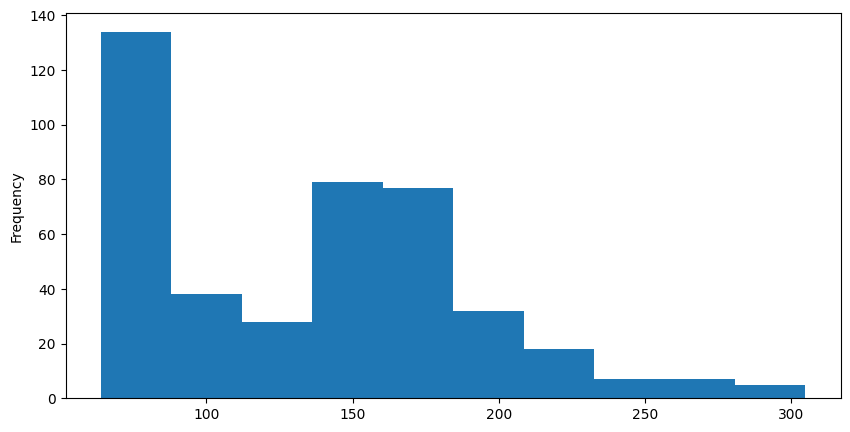

In [280]:
plt.figure(figsize = (10,5))
housing_df['house_price_index'].plot(kind = "hist")

In [281]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai,year,month,day
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN,1987,1,1
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN,1987,2,1
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN,1987,3,1
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN,1987,4,1
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN,1987,5,1


In [282]:
x = df['population'].values
y = df['house_price_index'].values

In [283]:
x = x.reshape(-1, 1)

In [284]:
poly = PolynomialFeatures(degree=28)

In [285]:
x_poly = poly.fit_transform(x)

In [286]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=28)

In [287]:
linreg = LinearRegression()

In [288]:
linreg.fit(x_poly, y)

LinearRegression()

In [289]:
y_pred = linreg.predict(x_poly)

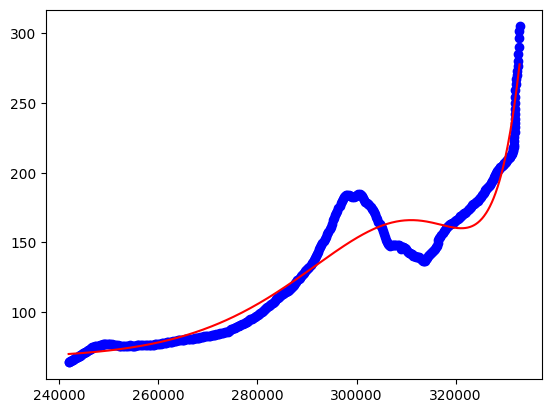

In [290]:
plt.scatter(x,y, color='blue')
plt.plot(x, y_pred, color='red')